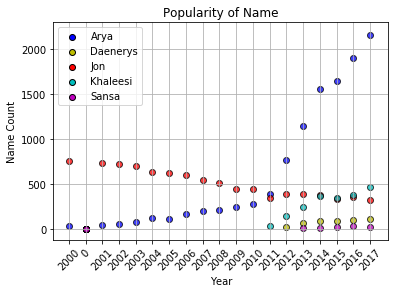

In [1]:
%matplotlib inline

import pandas as pd
import os
from matplotlib import pyplot as plt
import requests
import json


# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
# find the name in the current file and plot the point
        for name in got_names:
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != 0:
                plt.scatter(year,count,c=f"{name[2]}",edgecolor=(0,0,0),alpha=0.75)

handles = [plt.scatter([],
                     [],
                     marker="o",
                     color=name[2],
                     label=name[0],
                     edgecolor=(0,0,0)) for name in got_names]
plt.legend(handles=handles,
           markerscale=1)
# rotate years, add title and x/y labels    
plt.xticks(rotation=45)
plt.title("Popularity of Name")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.show()

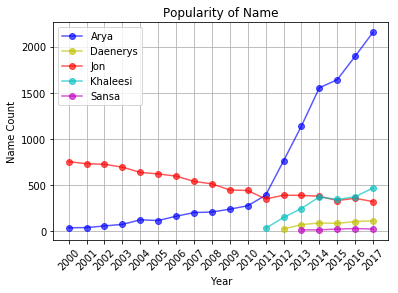

In [2]:
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Arya","F","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
arya = []
daenerys = []
jon = []
khaleesi = []
sansa = []
total_counts = []
averages = []
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for 2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
        total_counts.append(name_df[name_df["Year"]==f'{name_df["Year"][0]}']["Birth Count"].sum())
        averages.append([os.path.splitext(filename)[0][-4:],name_df["Birth Count"].mean()])
# find the name in the current file and plot the point
        for name in got_names:
            character = name[0]
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            birth_count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != '0':
                if character == "Arya":
                    arya.append([year,birth_count,'b'])
                elif character == "Daenerys":
                    daenerys.append([year,birth_count,'y'])
                elif character == "Jon":
                    jon.append([year,birth_count,'r'])
                elif character == "Khaleesi":
                    khaleesi.append([year,birth_count,'c'])
                elif character == "Sansa":
                    sansa.append([year,birth_count,'m'])

aryadf = pd.DataFrame(arya, columns=["Year","Birth Count","Color"])
daenerysdf = pd.DataFrame(daenerys, columns=["Year","Birth Count","Color"])
jondf = pd.DataFrame(jon, columns=["Year","Birth Count","Color"])
khaleesidf = pd.DataFrame(khaleesi, columns=["Year","Birth Count","Color"])
sansadf = pd.DataFrame(sansa, columns=["Year","Birth Count","Color"])



dflist = [aryadf, daenerysdf, jondf, khaleesidf, sansadf]
for df, name in zip(dflist, got_names):
    plt.plot(df["Year"],df["Birth Count"], marker='o', label=name[0], alpha=.65, c=f"{df['Color'][0]}")
plt.legend()
# rotate years, add title and x/y labels    
plt.xticks(rotation=45)
plt.title("Popularity of Name")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.savefig("Graph_Images/GoT/mixed_GOT_names.png")
plt.show()

In [3]:
averagedf = pd.DataFrame(averages)
averagedf = averagedf.rename(columns={0:"Year",1:"name(average)"})

In [4]:
averagedf

,Year,name(average)
0,2000,126.913198
1,2001,123.606693
2,2002,122.240683
3,2003,121.860341
4,2004,119.152500
5,2005,118.048424
6,2006,115.982982
7,2007,114.277740
8,2008,111.957742
9,2009,109.954412


In [5]:
# the above is the average number of babies born with the same name in given year.
# (ex. Each name, on average, had 110 people born with it in 2016)
# this can be used to compare the amount of people with an average to our GOT names.


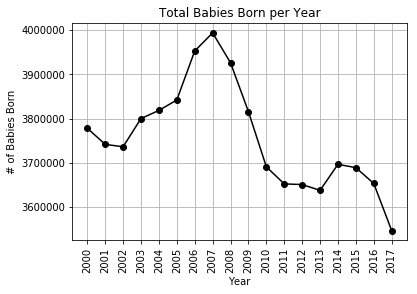

In [6]:
plt.plot(averagedf["Year"],total_counts, marker='o', c="k")
plt.xticks(rotation=90)
plt.title("Total Babies Born per Year")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
plt.grid()
plt.savefig("Graph_Images/GoT/babies_born_per_year.png")
plt.show()
# interesting note: Sharp change in babies born per year around '07. Possibly due to finacial crisis?

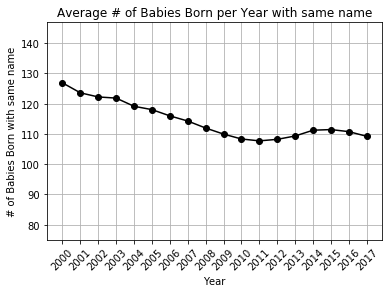

In [7]:
plt.plot(aryadf["Year"],averagedf["name(average)"], marker='o', c="k")
plt.xticks(rotation=45)
plt.ylim(75,averagedf["name(average)"].max()+20)
plt.title("Average # of Babies Born per Year with same name")
plt.xlabel("Year")
plt.ylabel("# of Babies Born with same name")
plt.grid()
plt.savefig("Graph_Images/GoT/average_name_use.png")
plt.show()

In [8]:
aryadf = aryadf.drop('Color',axis=1)
jondf = jondf.drop('Color',axis=1)
sansadf = sansadf.drop('Color',axis=1)
daenerysdf = daenerysdf.drop('Color',axis=1)
khaleesidf = khaleesidf.drop('Color',axis=1)

In [9]:
aryadf

,Year,Birth Count
0,2000,34
1,2001,36
2,2002,54
3,2003,71
4,2004,120
5,2005,113
6,2006,159
7,2007,199
8,2008,205
9,2009,236


In [10]:
jondf

,Year,Birth Count
0,2000,752
1,2001,729
2,2002,723
3,2003,692
4,2004,635
5,2005,618
6,2006,595
7,2007,537
8,2008,511
9,2009,444


In [11]:
sansadf

,Year,Birth Count
0,2013,11
1,2014,12
2,2015,20
3,2016,26
4,2017,20


In [12]:
daenerysdf

,Year,Birth Count
0,2012,21
1,2013,68
2,2014,86
3,2015,82
4,2016,101
5,2017,110


In [13]:
khaleesidf

,Year,Birth Count
0,2011,28
1,2012,146
2,2013,243
3,2014,369
4,2015,341
5,2016,371
6,2017,466


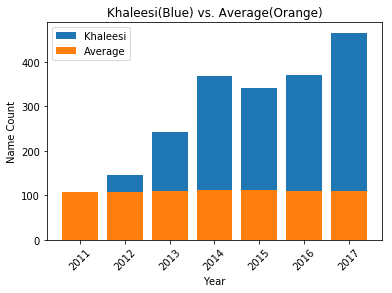

In [14]:
plt.bar(khaleesidf["Year"],khaleesidf["Birth Count"],label="Khaleesi")
plt.bar(khaleesidf["Year"], averagedf['name(average)'][-len(khaleesidf):],label="Average")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.title("Khaleesi(Blue) vs. Average(Orange)")
plt.legend()
plt.savefig("Graph_Images/GoT/khaleesi_vs_average.png")

In [15]:
def plotList(names, gender, marker='o',alpha=0.65):
    """names = a list of names
       gender = a single string character, either 'F', or 'M' to respresent female or male respectively
       """
    df = pd.DataFrame()
    for filename in os.listdir("Resources/names"):
        if 'yob20' in filename:
            name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
            name_df = pd.DataFrame(name_file)
            name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
    # add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
            name_df["Year"] = os.path.splitext(filename)[0][-4:]
    # find the name in the current file and plot the point
            name_df = name_df[name_df["Gender"]==gender]
            df = df.append(name_df)


    gotDF = df[df["Name"].isin(names)]
    for name in names:
        plt.plot(gotDF[gotDF["Name"]==f"{name}"]["Year"],gotDF[gotDF["Name"]==f"{name}"]["Birth Count"],marker=marker,alpha=alpha)
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(labels=names)

In [16]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
female_names = []
#request Copy/paste 2 lines into new blocks
females = {"Arya": 148,
           "Arienne": 130,
           "Asha":150,
           "Brienne":216,
           "Cersei": 238}
colors = ['b','r','y','c','m']
for female,color in zip(females.values(),colors):
    response = requests.get(f"{url}Characters/{female}").json()['name'].split()[0]

    female_names.append(response)
female_names

['Arya', 'Arianne', 'Asha', 'Brienne', 'Cersei']

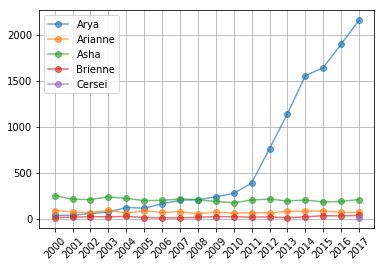

In [17]:
plotList(female_names,"F")

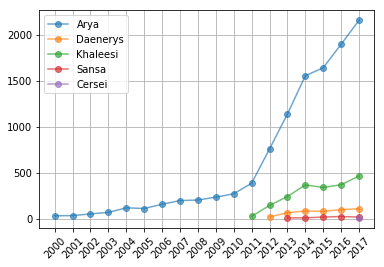

In [18]:
names = ["Arya",
         "Daenerys",
         "Khaleesi",
         "Sansa",
         "Cersei"]
         
plotList(names,"F")

In [19]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
male_names = []
#request Copy/paste 2 lines into new blocks
males = {"Benjen":182,
         "Bran":208,
         "Doran":326,
         "Eddard":339,
         "Jon":583}


for male in males.values():
    response = requests.get(f"{url}Characters/{male}").json()['name'].split()[0]

    male_names.append(response)
male_names

['Benjen', 'Brandon', 'Doran', 'Eddard', 'Jon']

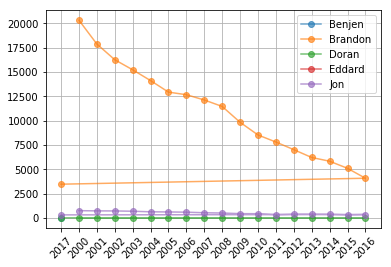

In [20]:
plotList(male_names,"M")

# something weird going on with 2017 on this one